<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:110%; text-align:left">

<h3 align="left"><font color='#4E5672'>📝 Description:</font></h3>

**Wine Quality Prediction Dataset**

The Wine Quality Prediction dataset is a comprehensive collection of features related to the chemical composition of various wines, along with a quality rating. This dataset is commonly used in machine learning and statistical modeling to predict the quality of wines based on their chemical attributes.It serves as a valuable resource for exploring the relationships between various chemical factors and the perceived quality of the wine. 
    
<center><img src="https://i.imgur.com/PlO5DSJ.png"> </center>
    

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

--2023-11-21 20:38:59--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine-dawn.mplstyle’

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.004s  

2023-11-21 20:38:59 (9.15 MB/s) - ‘/tmp/rose-pine-dawn.mplstyle’ saved [40905/40905]



# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⇣ Reading and Cleaning Data ⇣</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Reading</p>

In [2]:
train = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<div style="border-radius:10px; border:#6B8BA0 solid; padding: 15px; background-color: #F2EADF; font-size:100%; text-align:left">

<h3 align="left"><font color='#6B8BA0'>👀 Features: </font></h3>


1. **Fixed Acidity:** This refers to the non-volatile acids in the wine. These acids do not evaporate easily and play a crucial role in determining the overall acidity of the wine.

2. **Volatile Acidity:** Unlike fixed acidity, volatile acidity is the measure of the volatile acids in the wine. Too much volatile acidity can result in an unpleasant vinegar-like taste.

3. **Citric Acid:** This is the amount of citric acid in the wine. Citric acid can add a citrusy flavor to the wine and is often found in higher quantities in certain types of wines.

4. **Residual Sugar:** This indicates the amount of sugar left in the wine after fermentation. Wines with higher residual sugar may taste sweeter.

5. **Chlorides:** The concentration of salt in the wine. In small amounts, chlorides can enhance the flavor, but excessive levels can result in a salty taste.

6. **Free Sulfur Dioxide:** Sulfur dioxide is commonly used in winemaking as a preservative. It prevents the growth of undesirable microorganisms and oxidation.

7. **Total Sulfur Dioxide:** The total amount of sulfur dioxide in the wine, including both free and bound forms. Too much sulfur dioxide can negatively impact the taste and aroma of the wine.

8. **Density:** The density of the wine, which is influenced by the sugar and alcohol content. It gives an indication of the body or richness of the wine.

9. **pH:** This represents the acidity or basicity of the wine on a scale from 0 to 14. Lower values indicate higher acidity, while higher values indicate lower acidity.

10. **Sulphates:** These are compounds that can contribute to the wine's aroma and act as antioxidants. They are also added to wines as a preservative.

11. **Alcohol:** The percentage of alcohol in the wine. This can influence the body and mouthfeel of the wine, as well as its overall character.

12. **Quality:** This is often the target variable in prediction models. It represents the perceived quality of the wine and is usually rated on a scale. Higher quality wines are expected to have better characteristics in the other features mentioned.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Cleaning</p>

In [4]:
train.columns = [col.replace(" ", "_") for col in train.columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
train.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
train.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Looks like the data has no missing value, and our data is full of numeric features.

In [8]:
train.duplicated().sum()

240

In [9]:
train.drop_duplicates(inplace = True)

In [10]:
train = train.reset_index(drop=True)

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Let's drop the duplicated 240 rows in the train set, Don't clear the duplicates in the test set, your submission should be the same size of the competition wants.

In [11]:
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [12]:
target = [col for col in train.columns if train[col].nunique()<10]
target

['quality']

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 📈 EDA 📈</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Target</p>

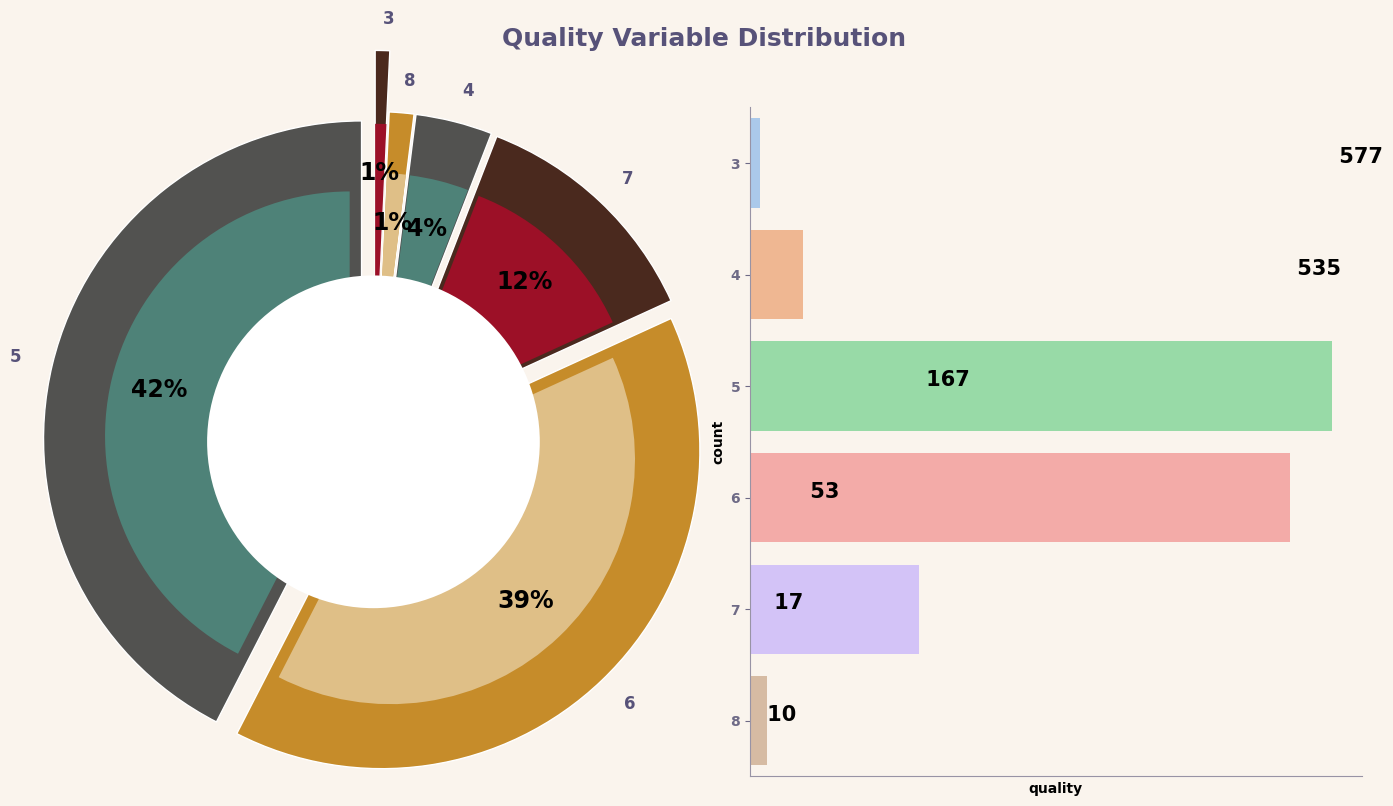

In [13]:
# https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    
    f, ax = plt.subplots(1, 2, figsize=(14, 8))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#525250', '#C68C2A','#4A291E']
    inner_colors = ['#4E8278', '#DFBF87','#9C1027']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 17, 
        'weight': 'bold', 
        'color': 'black'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='pastel', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i, " "+str(v), color='black', fontweight='bold', fontsize=15)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_count(train, 'quality', 'Quality Variable Distribution')

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  I created a temporary categorical variable to check the distribution of the target variable.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Categorical</p>

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  No cat feature..
    

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Numerical</p>

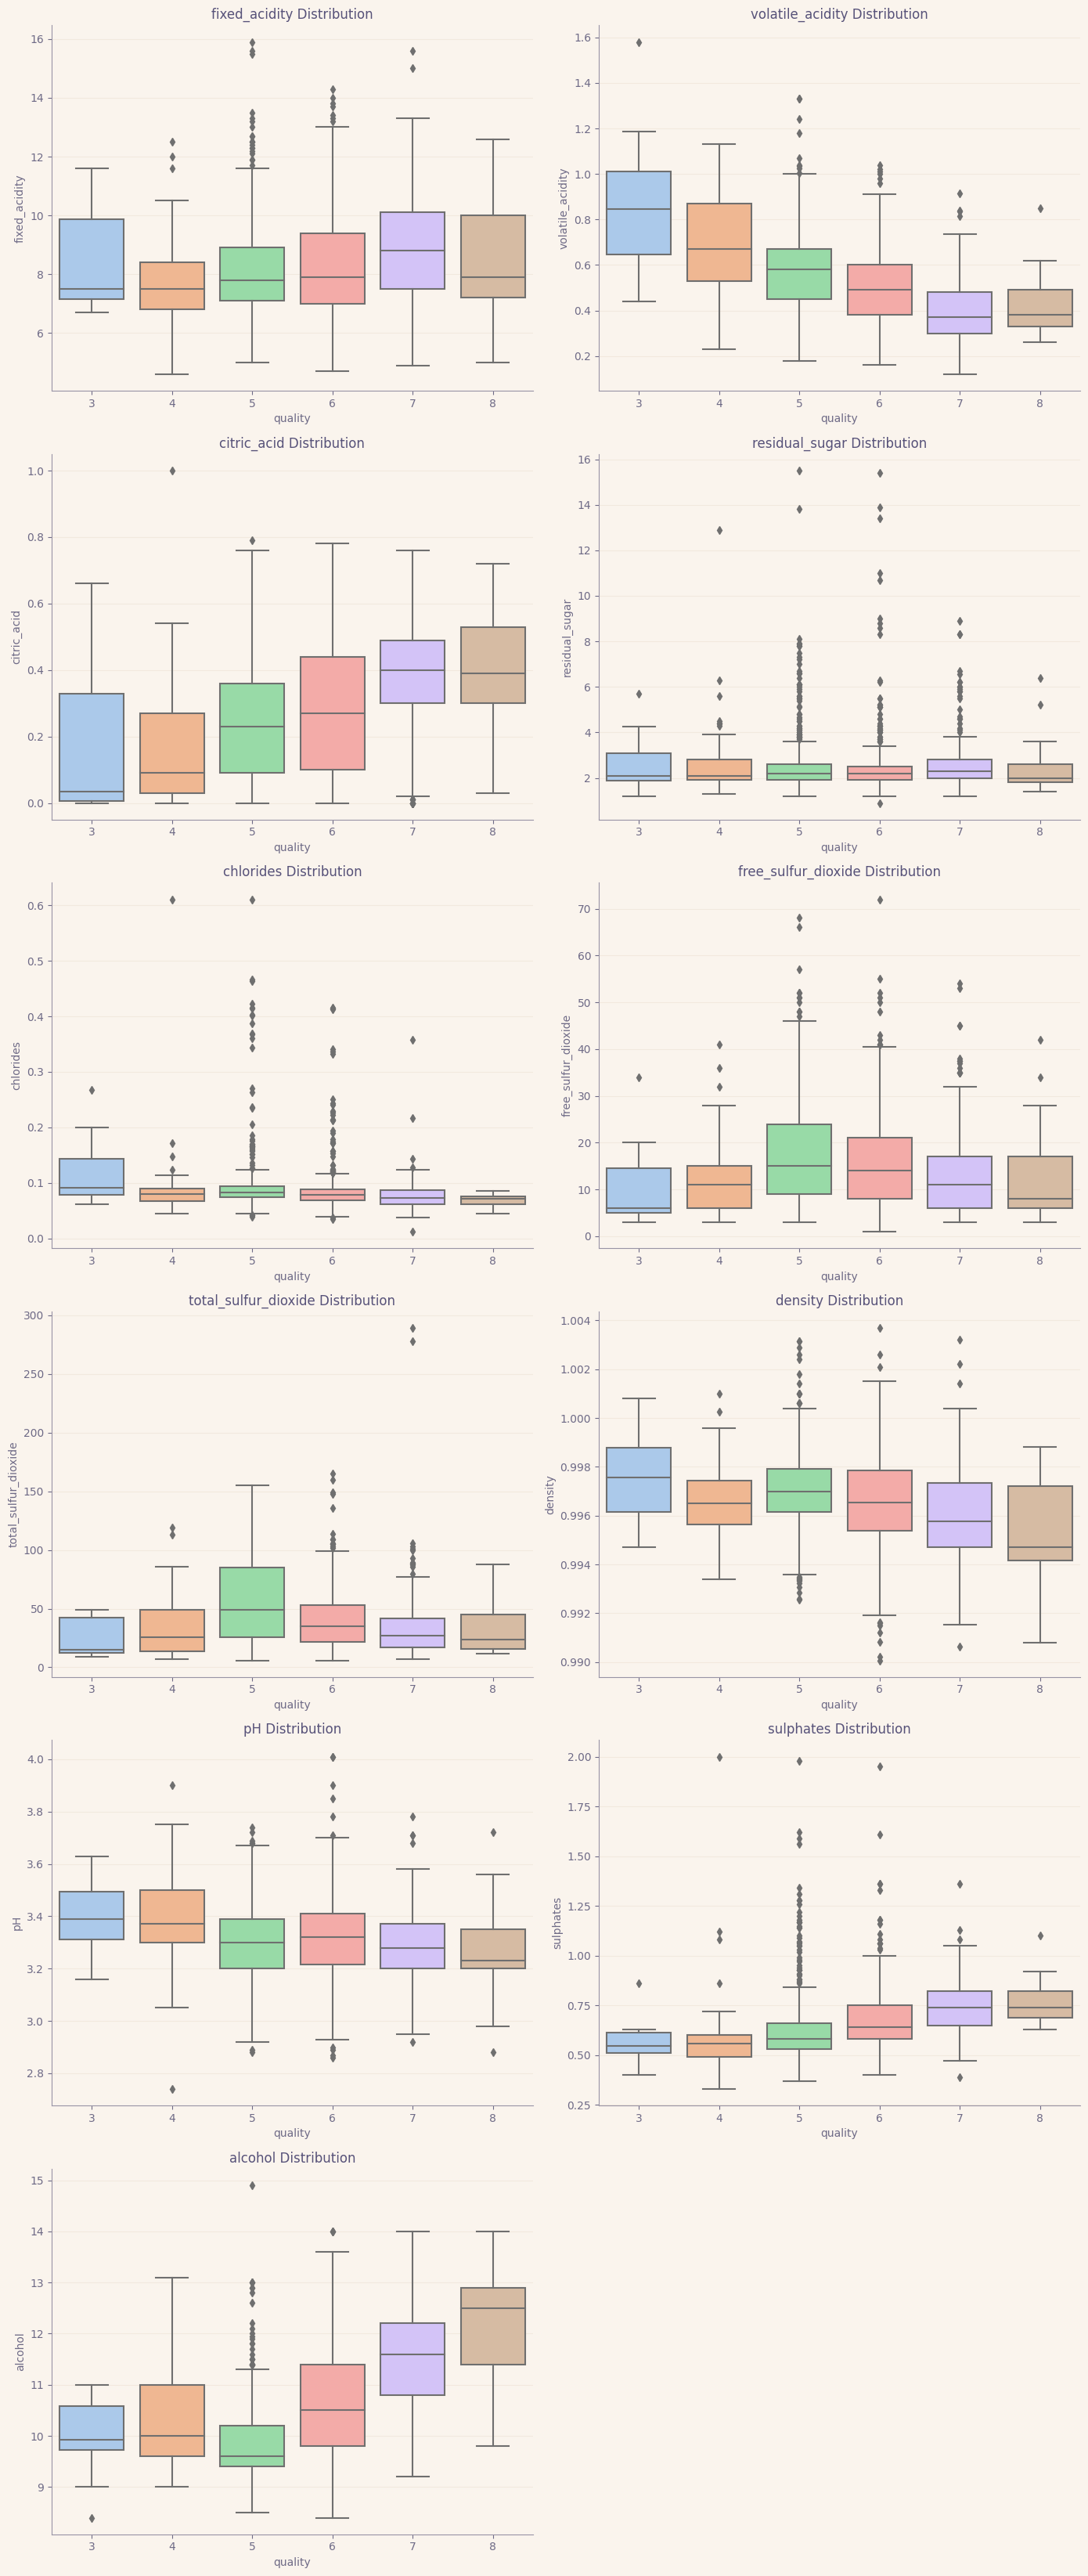

In [14]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="quality", y=column, data=train,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

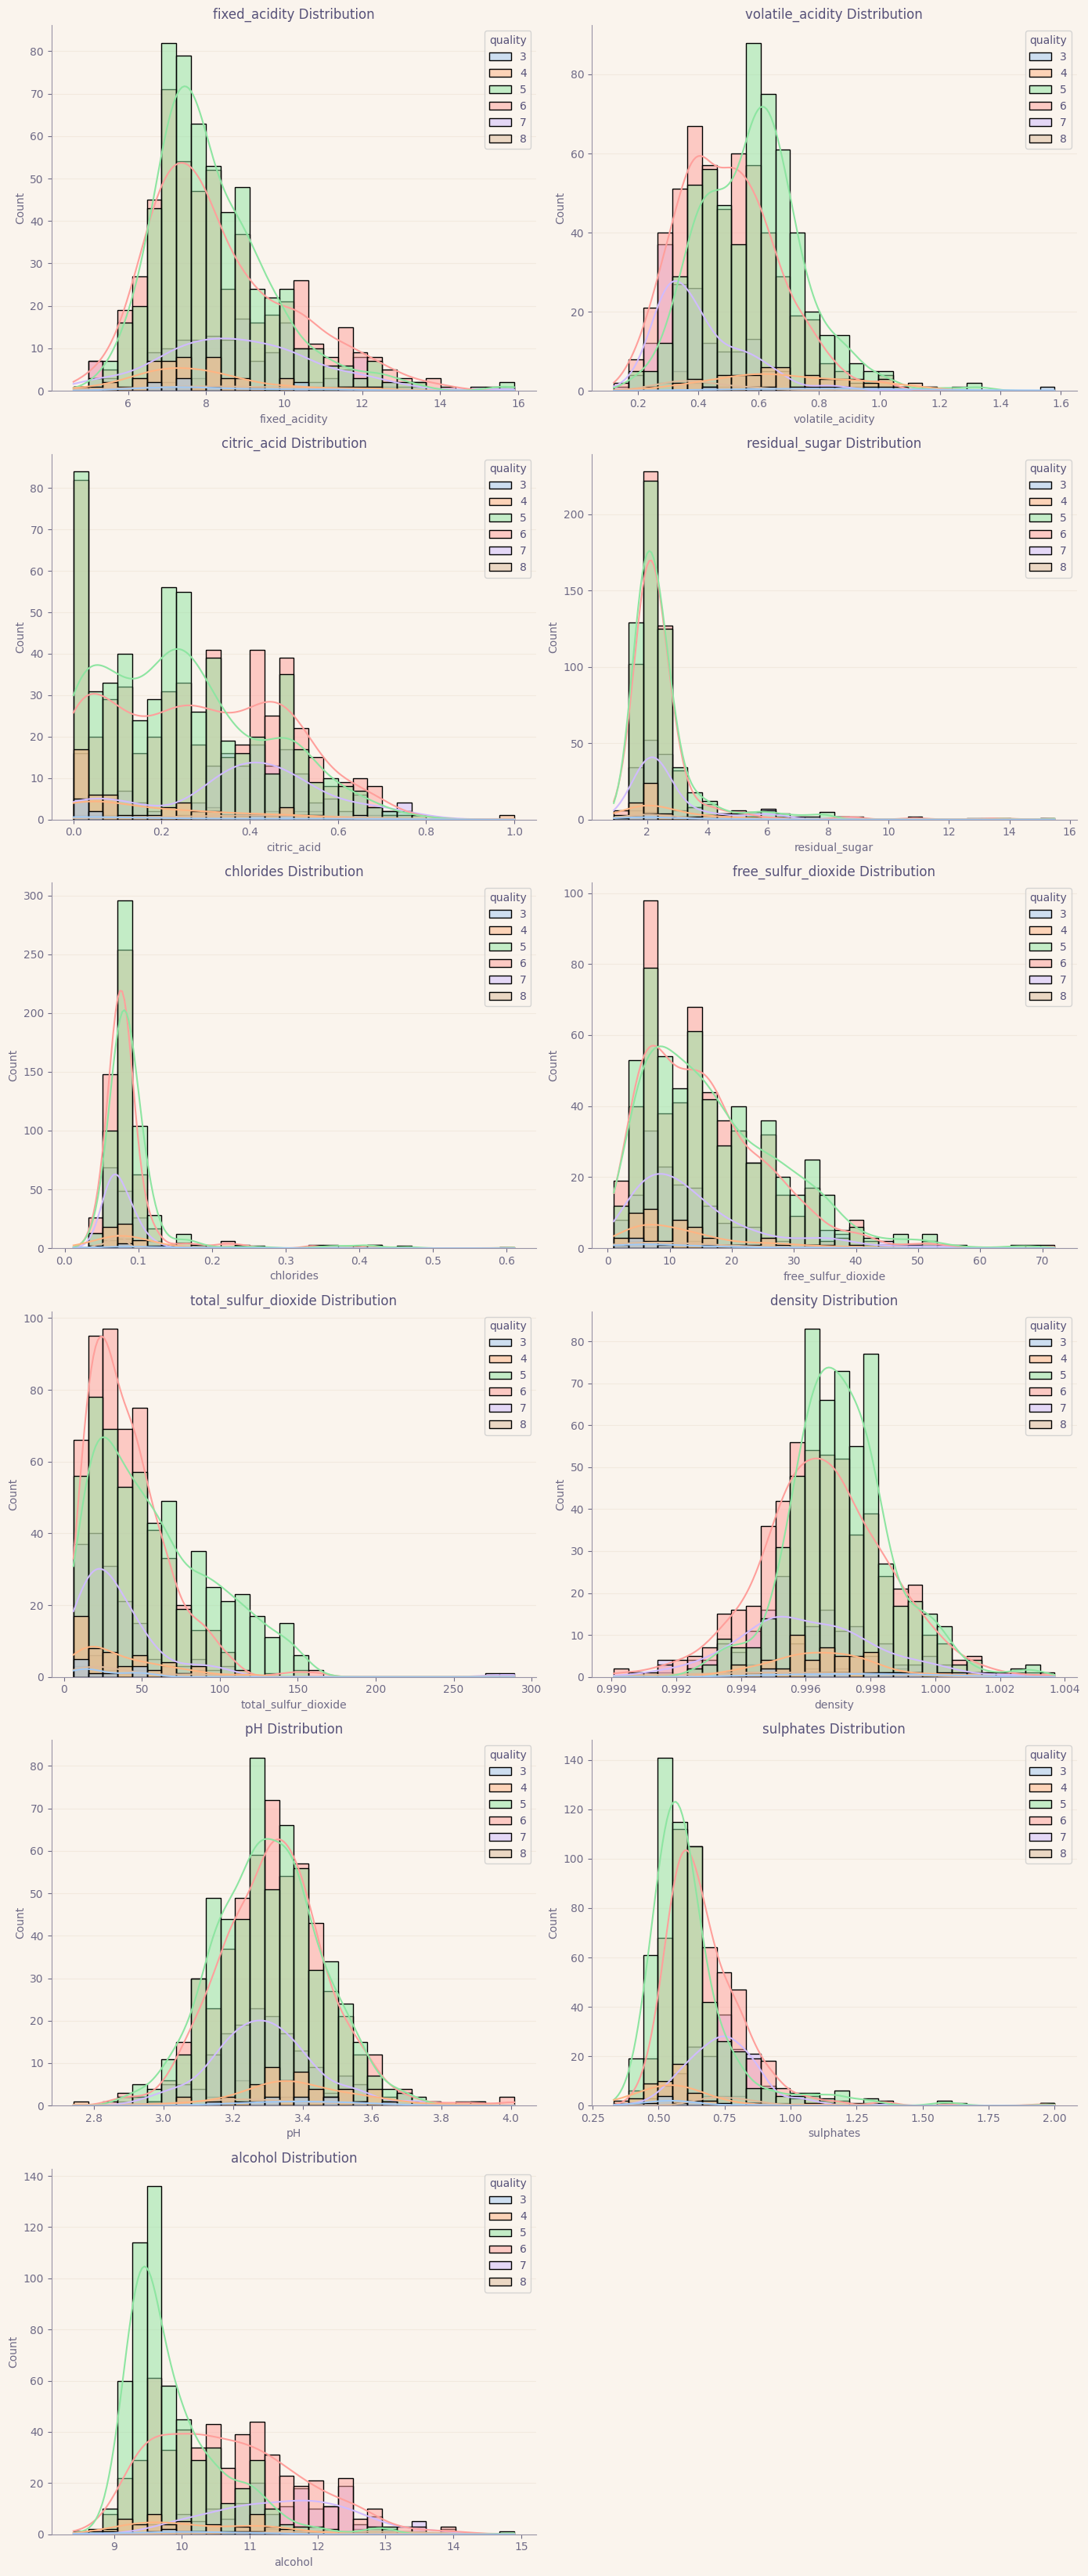

In [15]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="quality", data=train,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

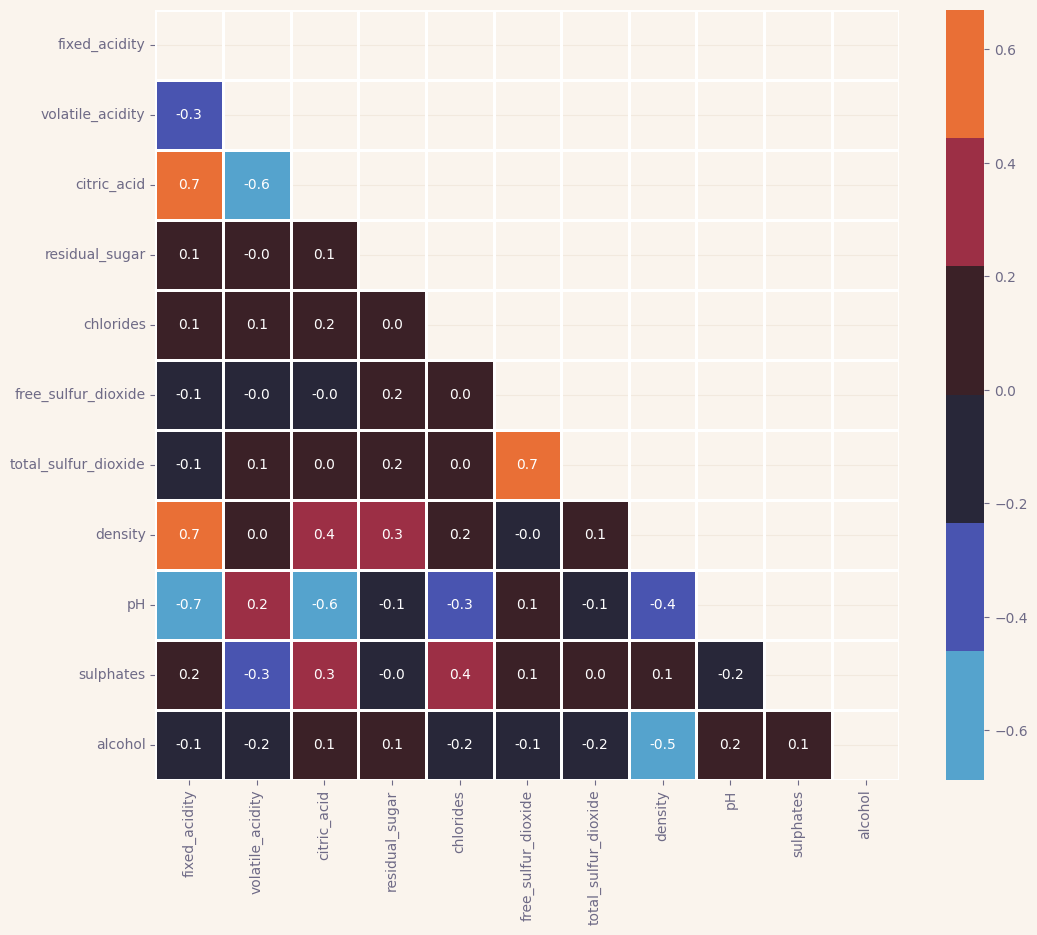

In [16]:
plt.figure(figsize=(12,10))
corr=train[num_cols].corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("icefire"));

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Looks like we have highly correlated features, and also have outliner and skewness, but I won't take care of them since we are using tree models.

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🛠️Feature Engineering 🛠️</p>

In [17]:
def new_features(df):
    # 1. Acidity Ratios
    df['TotalAcidity'] = df['fixed_acidity'] + df['volatile_acidity'] + df['citric_acid']

    # 2. Free Sulfur Dioxide / Total Sulfur Dioxide Ratio
    df['FreeSulfurToTotalSulfurRatio'] = df['free_sulfur_dioxide'] / df['total_sulfur_dioxide']

    # 3. Alcohol and Sugar Ratio
    df['AlcoholToSugarRatio'] = df['alcohol'] / df['residual_sugar']

    # 4. Free Sulfur Dioxide / pH Ratio
    df['FreeSulfurToPHRatio'] = df['free_sulfur_dioxide'] / df['pH']

    # 5. Alcohol and Acidity Ratio
    df['AlcoholToAcidityRatio'] = df['alcohol'] / df['TotalAcidity']

    # 6. Density and Sugar Ratio
    df['DensityToSugarRatio'] = df['density'] / df['residual_sugar']

    # 7. Various Mathematical Operations
    df['AcidityMinusPH'] = df['TotalAcidity'] - df['pH']
    df['AlcoholTimesSulfates'] = df['alcohol'] * df['sulphates']


    # 8. Alcohol Classes
    df['AlcoholClass'] = pd.cut(df['alcohol'], 
                                bins=[0, 10, 12, float('inf')], 
                                labels= ['Low', 'Medium', 'High'], 
                                include_lowest=True).map({"Low":0,"Medium":1,"High":2}).astype(int)

    # 9. pH and Acidity Ratio
    df['PHToAcidityRatio'] = df['pH'] / df['TotalAcidity']

    # 10. Chlorides and Density Ratio
    df['ChloridesToDensityRatio'] = df['chlorides'] / df['density']

    # 11. Alcohol and Sulphates Ratio
    df['AlcoholToSulphatesRatio'] = df['alcohol'] / df['sulphates']
    
new_features(train)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>🛠️ New Features:</font></h3>
    

1. **Acidity Ratios (`TotalAcidity`):**
   - **Calculation:** Sum of fixed acidity, volatile acidity, and citric acid.
   - **Interpretation:** Represents the total acidity in the wine, considering both volatile and non-volatile acids.

2. **Free Sulfur Dioxide / Total Sulfur Dioxide Ratio (`FreeSulfurToTotalSulfurRatio`):**
   - **Calculation:** Ratio of free sulfur dioxide to total sulfur dioxide.
   - **Interpretation:** Indicates the proportion of sulfur dioxide in the free form relative to the total sulfur dioxide content.

3. **Alcohol and Sugar Ratio (`AlcoholToSugarRatio`):**
   - **Calculation:** Ratio of alcohol content to residual sugar.
   - **Interpretation:** Represents the relationship between alcohol concentration and residual sugar in the wine.

4. **Free Sulfur Dioxide / pH Ratio (`FreeSulfurToPHRatio`):**
   - **Calculation:** Ratio of free sulfur dioxide to pH.
   - **Interpretation:** Reflects the balance between free sulfur dioxide and the acidity or basicity of the wine.

5. **Alcohol and Acidity Ratio (`AlcoholToAcidityRatio`):**
   - **Calculation:** Ratio of alcohol content to total acidity.
   - **Interpretation:** Captures the relationship between alcohol concentration and the overall acidity of the wine.

6. **Density and Sugar Ratio (`DensityToSugarRatio`):**
   - **Calculation:** Ratio of density to residual sugar.
   - **Interpretation:** Describes the relationship between the density and sugar content in the wine.

7. **Various Mathematical Operations (`AcidityMinusPH`, `AlcoholTimesSulfates`):**
   - **AcidityMinusPH:** The difference between total acidity and pH.
   - **AlcoholTimesSulfates:** The product of alcohol content and sulfates.

8. **Alcohol Classes (`AlcoholClass`):**
   - **Calculation:** Categorizes alcohol content into classes (Low, Medium, High).
   - **Interpretation:** Groups the wines based on their alcohol content for classification purposes.

9. **pH and Acidity Ratio (`PHToAcidityRatio`):**
    - **Calculation:** Ratio of pH to total acidity.
    - **Interpretation:** Reflects the balance between the pH level and the overall acidity of the wine.

10. **Chlorides and Density Ratio (`ChloridesToDensityRatio`):**
    - **Calculation:** Ratio of chlorides to density.
    - **Interpretation:** Describes the relationship between the chloride concentration and the density of the wine.

11. **Alcohol and Sulphates Ratio (`AlcoholToSulphatesRatio`):**
    - **Calculation:** Ratio of alcohol content to sulfates.
    - **Interpretation:** Represents the relationship between alcohol concentration and the sulfates content in the wine.


In [18]:
num_cols = [col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]
cat_cols = [col for col in train.columns if train[col].nunique()<6]
cat_cols

['AlcoholClass']

In [19]:
train = pd.get_dummies(train,columns=cat_cols, drop_first=True, dtype="int")

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Created dummies from categorical features, and dropped their first column, then converted to int.

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;">⚖️Modeling⚖️</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  You can reduce the size of data with PCA here, but I wont on this notebook.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Split</p>

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train.drop(["quality"], axis=1)
y = train["quality"]
y = y - 3 # classes was 3-4-5-6-7-8, changed them to 0-1-2-3-4-5 temporarily for modeling

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)



### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Feature Importance</p>

0.6507352941176471

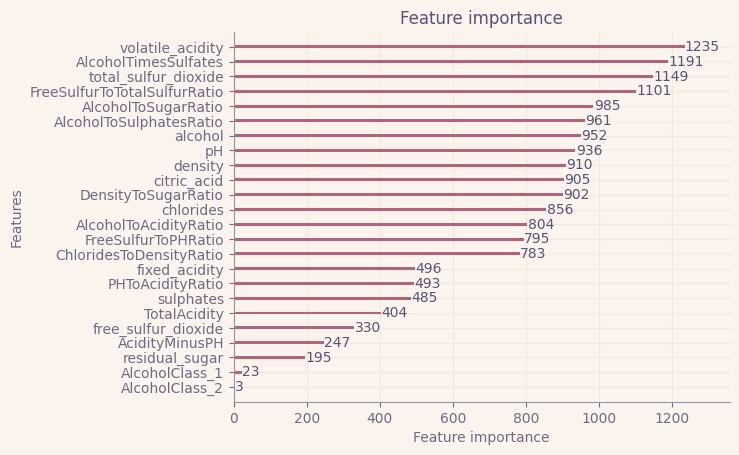

In [35]:
import lightgbm
lgb = lightgbm.LGBMClassifier(objective = "multiclass")
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
accuracy_score(y_test,lgb.predict(X_test))

0.6139705882352942

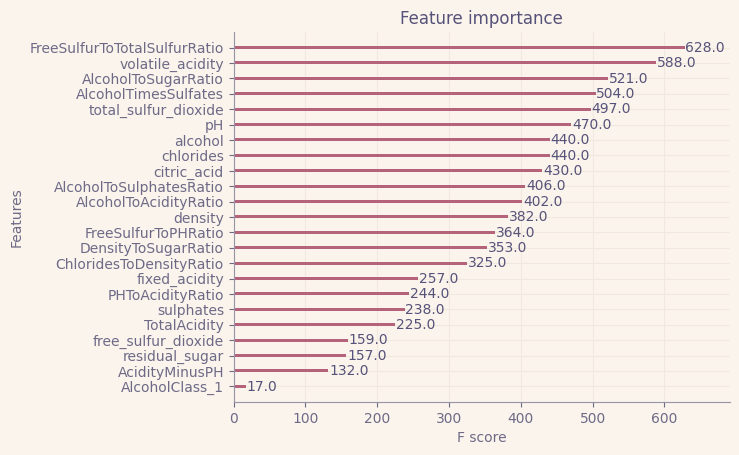

In [36]:
import xgboost
xgb = xgboost.XGBClassifier(objective = "multi:softmax")
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb);
accuracy_score(y_test,xgb.predict(X_test))

In [37]:
from sklearn.preprocessing import MinMaxScaler
lgb_importances = pd.DataFrame(dict(lgbm = lgb.feature_importances_), index=lgb.feature_name_)
xgb_importances = pd.DataFrame(dict(xgb = xgb.feature_importances_), index=xgb.feature_names_in_)
importances = pd.concat([lgb_importances,xgb_importances],axis=1)
min_max = MinMaxScaler((1,1.1))
importances["cross"] = min_max.fit_transform(importances[["lgbm"]]) * min_max.fit_transform(importances[["xgb"]])
sorted = importances.sort_values(by="cross", ascending=False)
sorted

,lgbm,xgb,cross
AlcoholTimesSulfates,1191,0.094274,1.196930
alcohol,952,0.102849,1.184732
total_sulfur_dioxide,1149,0.058740,1.155445
volatile_acidity,1235,0.045411,1.148568
FreeSulfurToTotalSulfurRatio,1101,0.036426,1.127697
chlorides,856,0.049578,1.120779
AlcoholToSulphatesRatio,961,0.039844,1.119513
AlcoholToSugarRatio,985,0.035853,1.117346
density,910,0.039099,1.114435
pH,936,0.033911,1.111199


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Feature importances, sorted by their hybrid importance in LightGBM (lgb) and XGBoost (xgb), We may drop **AlcoholClass_1** and **AlcoholClass_2** (we added)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">LightGBM Classifier</p>

In [38]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['multiclass']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
    }


    model_lgb = LGBMClassifier(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [39]:
study_lgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [40]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'multiclass', 'max_depth': 2, 'min_child_samples': 6, 'learning_rate': 0.01503576202259768, 'n_estimators': 579, 'min_child_weight': 7, 'subsample': 0.3459607610650149, 'colsample_bytree': 0.683787227524476, 'reg_alpha': 0.9430942662972854, 'reg_lambda': 0.9234429002185324, 'seed': 42}


In [41]:
lgb = LGBMClassifier(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6654411764705882


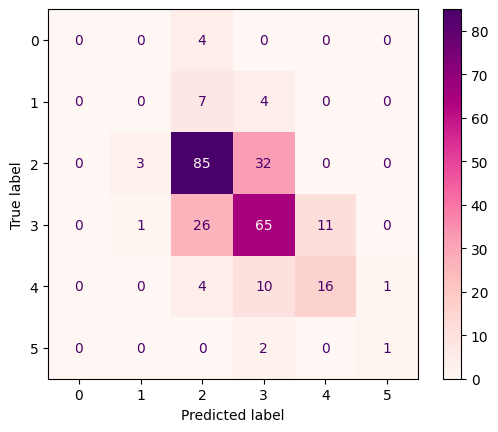

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb,X_test, y_test,cmap="RdPu");

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">XGBoost Classifier</p>

In [46]:
from xgboost import XGBClassifier
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'objective': trial.suggest_categorical('objective', ['multi:softmax']),
    }
    model_xgb = XGBClassifier(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [47]:
study_xgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [48]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 8, 'learning_rate': 0.01024003042585199, 'n_estimators': 700, 'min_child_weight': 5, 'gamma': 7.66068545752075e-06, 'subsample': 0.5874971257150364, 'reg_alpha': 0.9128643854464513, 'reg_lambda': 0.08879784483439618, 'seed': 42, 'objective': 'multi:softmax'}


In [49]:
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6580882352941176


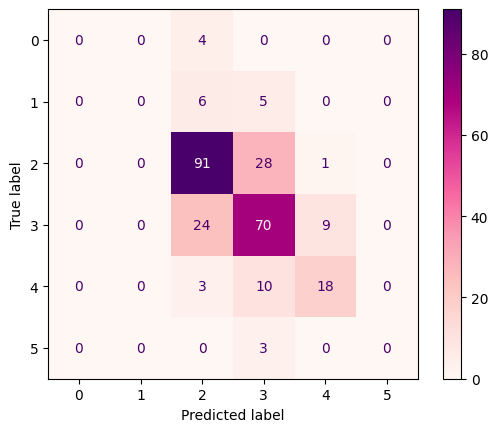

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb,X_test, y_test,cmap="RdPu");

# <p style="background-color:#F8F1E8; font-family:newtimeroman;color:#602F44; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🎲Prediction🎲</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Voting Classifier</p>

In [53]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
                                      ('lgbm', lgb), 
                                      ('xgb', xgb)], voting='hard')
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, voting_pred))

Accuracy:  0.6691176470588235


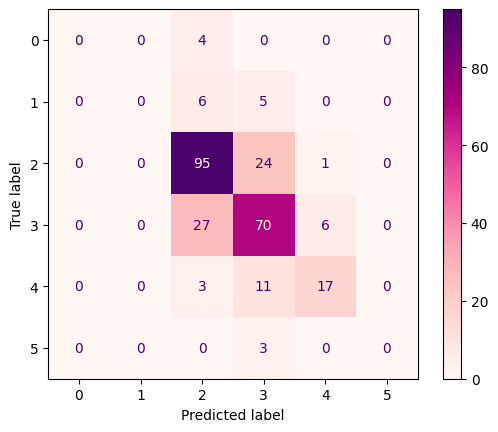

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(voting,X_test, y_test,cmap="RdPu");